In [2]:
import pickle as pckl
import seaborn as sb
import pandas as pd
from datetime import datetime

In [46]:
data = pckl.load(open('ARK.pckl','rb'))

In [47]:
data.head()

,author.last_played,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.steamid,comment_count,language,received_for_free,recommendationid,review,steam_purchase,timestamp_created,timestamp_updated,voted_up,votes_funny,votes_up,weighted_vote_score,written_during_early_access
0,1548014842,6,1,412,412,76561198846762449,0,english,False,48448687,Cool but it completly ruined my Graphics Card...,True,1548014192,1548014192,False,1,0,0,False
1,1548017764,238,35,2235,2235,76561198008955625,0,english,False,48430381,"After 30 hours of gameplay, this is how it was...",False,1547938970,1548013264,False,0,1,0.523809552192687988,False
2,1545131771,171,3,5473,0,76561197991488912,0,english,False,48447847,Made by the scummiest gaming company ever.,False,1548011162,1548011162,False,0,2,0.52173912525177002,False
3,1504742084,377,6,101,0,76561198013957136,0,english,False,48447210,"""Disk space required: 101093 mb"" oh my lord",False,1548008968,1548008968,False,1,0,0,False
4,1548017463,11,1,575,575,76561197993720855,0,english,False,48446867,So i have spent over 24 hours trying to log in...,True,1548007836,1548007836,False,0,1,0.523809552192687988,False


In [48]:
features_dict = {'review': 'review',
                'voted_up': 'upvoted',
                'votes_up': 'comment_upvotes',
                'votes_funny': 'comment_funny_votes',
                'written_during_early_access': 'early_review',
                'timestamp_updated': 'time_of_review',
                'author.playtime_forever': 'minutes_played',
                'author.playtime_last_two_weeks': 'playtime_2weeks',
                'author.last_played': 'last_played',
                'author.num_games_owned': 'games_owned',
                'author.num_reviews': 'author_reviews',
                'steam_purchase': 'purchased',
                'received_for_free': 'free'}

features = list(features_dict.values())

In [55]:
df.iloc[0].review

"A concentrated, difficult but rewarding experience where each new game mechanic is pushed to its limit. The first few levels are perhaps the hardest. Don't give up.\n\nRecommended for puzzle game enthusiasts."

In [49]:
df = data.rename(index=str, columns=features_dict)
df = df[features]

In [50]:
df.head()

,review,upvoted,comment_upvotes,comment_funny_votes,early_review,time_of_review,minutes_played,playtime_2weeks,last_played,games_owned,author_reviews,purchased,free
0,Cool but it completly ruined my Graphics Card...,False,0,1,False,1548014192,412,412,1548014842,6,1,True,False
1,"After 30 hours of gameplay, this is how it was...",False,1,0,False,1548013264,2235,2235,1548017764,238,35,False,False
2,Made by the scummiest gaming company ever.,False,2,0,False,1548011162,5473,0,1545131771,171,3,False,False
3,"""Disk space required: 101093 mb"" oh my lord",False,0,1,False,1548008968,101,0,1504742084,377,6,False,False
4,So i have spent over 24 hours trying to log in...,False,1,0,False,1548007836,575,575,1548017463,11,1,True,False


In [17]:
df.last_played = datetime.utcfromtimestamp(df.last_played).strftime('%Y-%m-%d')

TypeError: cannot convert the series to <class 'int'>

In [51]:
df['last_played'] = pd.to_datetime(df['last_played'], unit='s')
df['time_of_review'] = pd.to_datetime(df['time_of_review'], unit='s')

In [19]:
df['last_played'] = pd.to_datetime(df['last_played'].astype(str).str[0:10])
df['time_of_review'] = pd.to_datetime(df['time_of_review'].astype(str).str[0:10])

In [52]:
total_upvotes = 0
upvotes = []
total_votes = list(range(1,len(df)+1))

for i in range(len(df)):
    if df.iloc[i].upvoted == True:
        total_upvotes += 1
        upvotes.append(total_upvotes)
    else:
        upvotes.append(total_upvotes)
        

In [53]:
df['upvotes'] = list(reversed(upvotes))
df['total_votes'] = list(reversed(total_votes))
df['percent_upvotes'] = df['upvotes']/df['total_votes']

In [45]:
del df

In [54]:
df.head()

,review,upvoted,comment_upvotes,comment_funny_votes,early_review,time_of_review,minutes_played,playtime_2weeks,last_played,games_owned,author_reviews,purchased,free,upvotes,total_votes,percent_upvotes
0,Cool but it completly ruined my Graphics Card...,False,0,1,False,2019-01-20 19:56:32,412,412,2019-01-20 20:07:22,6,1,True,False,68517,107106,0.639712
1,"After 30 hours of gameplay, this is how it was...",False,1,0,False,2019-01-20 19:41:04,2235,2235,2019-01-20 20:56:04,238,35,False,False,68516,107105,0.639709
2,Made by the scummiest gaming company ever.,False,2,0,False,2019-01-20 19:06:02,5473,0,2018-12-18 11:16:11,171,3,False,False,68515,107104,0.639705
3,"""Disk space required: 101093 mb"" oh my lord",False,0,1,False,2019-01-20 18:29:28,101,0,2017-09-06 23:54:44,377,6,False,False,68514,107103,0.639702
4,So i have spent over 24 hours trying to log in...,False,1,0,False,2019-01-20 18:10:36,575,575,2019-01-20 20:51:03,11,1,True,False,68513,107102,0.639699


In [64]:
pckl.dump(sorted_df,open('ARK_data.pckl','wb'))

In [56]:
%matplotlib inline

In [57]:
import seaborn as sb
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import DateFormatter

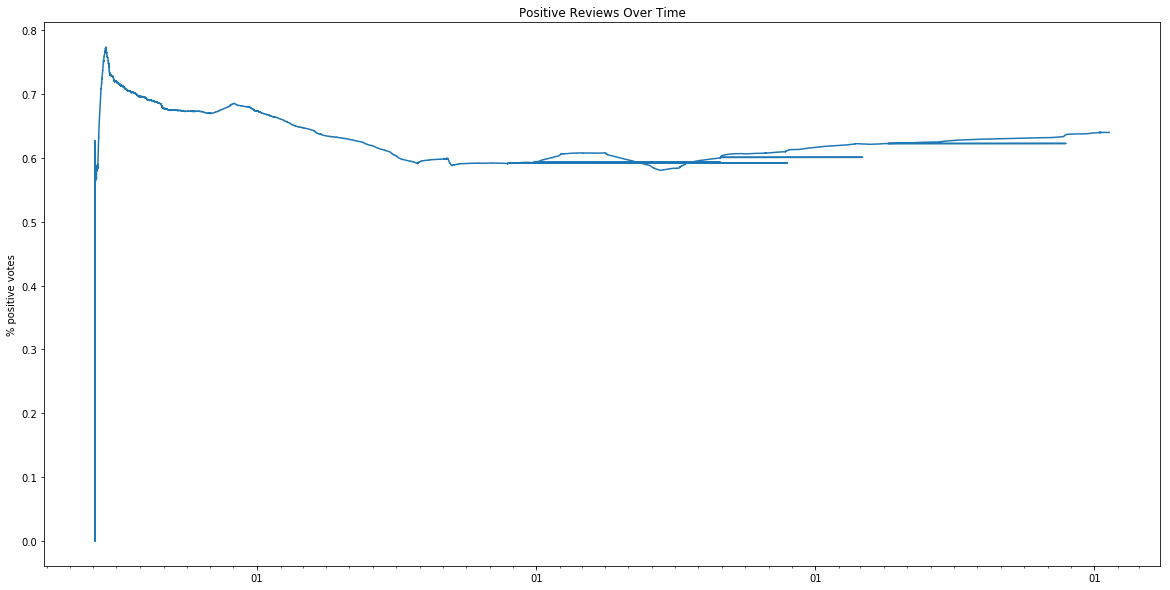

In [61]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%m')

date = sorted_df['time_of_review']
percent = sorted_df['percent_upvotes']

#ax = plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(date, percent)


ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

plt.ylabel('% positive votes')
plt.title('Positive Reviews Over Time')

plt.show()

In [62]:
sorted_df = df.sort_values(by='time_of_review',ascending=True)

In [60]:
type(df.time_of_review.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [63]:
sorted_df.head()

,review,upvoted,comment_upvotes,comment_funny_votes,early_review,time_of_review,minutes_played,playtime_2weeks,last_played,games_owned,author_reviews,purchased,free,upvotes,total_votes,percent_upvotes
107105,"Its really good, only down side is you cant fo...",True,100,203,True,2015-06-02 22:29:25,4578,0,2016-11-30 23:31:47,760,4,False,False,0,1,0.0
107104,This game manages to make you feel all sorts o...,True,744,44,True,2015-06-02 22:30:07,28946,0,2016-07-02 22:22:02,370,9,False,False,0,2,0.0
107103,LOVE THIS !!!!,True,74,13,True,2015-06-02 22:31:01,82165,0,2018-12-16 00:37:03,134,1,False,False,0,3,0.0
107102,At the point of this recommendation being made...,True,58,17,True,2015-06-02 22:35:36,664,0,2017-06-16 02:07:50,396,11,False,False,0,4,0.0
107101,"""Since *that game we all know of"" vanished the...",True,346,20,True,2015-06-02 22:36:41,43151,0,2016-06-17 09:25:14,634,82,False,False,0,5,0.0


                                                   review  upvoted  \
107105  Its really good, only down side is you cant fo...     True   
107104  This game manages to make you feel all sorts o...     True   
107103                                     LOVE THIS !!!!     True   
107102  At the point of this recommendation being made...     True   
107101  "Since *that game we all know of" vanished the...     True   

        comment_upvotes  comment_funny_votes  early_review  \
107105              100                  203          True   
107104              744                   44          True   
107103               74                   13          True   
107102               58                   17          True   
107101              346                   20          True   

            time_of_review  minutes_played  playtime_2weeks  \
107105 2015-06-02 22:29:25            4578                0   
107104 2015-06-02 22:30:07           28946                0   
107103 2015-06-02